## Target configuration

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

2018-02-14 18:07:42,011 INFO    : root         : Using LISA logging configuration:
2018-02-14 18:07:42,070 INFO    : root         :   /home/leoy/Work/tools/lisa-ml-20171106/logging.conf


In [2]:
%matplotlib inline

import os
import json

import devlib
from env import TestEnv

import trappy
# Support for trace events analysis
from trace import Trace

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from wlgen import RTA, Periodic, Ramp

In [3]:
res_dir = '/home/leoy/Work/tools/product-codeline/wlauto/agendas/dhrystone-test/prefer_idle_on-dhrystone_full-dhrystone-1/'
trace_file = os.path.join(res_dir, "trace.dat")

In [4]:
# Setup target configuration
my_conf = {

    # Target platform and board
    "platform"     : 'android',
    "board"        : 'hikey960',
    
    # Device serial ID
    # Not required if there is only one device connected to your computer
    "device"       : "270182BA020B1AA2",
    
    "ANDROID_HOME" : "/home/leoy/Work/tools/lisa-mainline/tools/android-sdk-linux",
    
    # Energy Meters Configuration for BayLibre's ACME Cape
    "emeter" : {
        "instrument" : "aep",
        "conf" : {
            'resistor_values' : [0.033],
            'device_entry'    : '/dev/ttyACM0'
        },
        "channel_map" : {
            "Device0" : "BAT"
        }
    },

    # Folder where all the results will be collected
    "results_dir" : "taskset_test",

    # Define devlib modules to load
    "modules"     : [
        'cpufreq',
        'cpuidle'
    ],

    # FTrace events to collect for all the tests configuration which have
    # the "ftrace" flag enabled
    "ftrace"  : {
         "events" : [
            "sched_switch",
            "sched_wakeup",
            "sched_wakeup_new",
            "sched_overutilized",
            "sched_load_avg_cpu",
            "sched_load_avg_task",
            "cpu_capacity",
            "cpu_frequency",
            "sched_sugov_util"
         ],
         "buffsize" : 100 * 1024,
    },

    # Tools required by the experiments
    "tools"   : [ 'trace-cmd', 'taskset', 'rt-app', 'sysbench'],
}

In [5]:
'''
Define platform parameters, these parameter is coming from
file platform.json; but we platform.json file is generated
after one running with LISA on the board. So for analysis
if we have no platform.json file we can define the variable
for this.
'''

platform = {
    'kernel': {
        'major': 4,
        'sha1': '78e8b90',
        'version': '57 SMP PREEMPT Sat Jul 1 15:42:00 CST 2017',
        'version_number': 4,
        'parts': [4, 4, 74],
        'rc': None,
        'release': '4.4.74-g78e8b90',
        'minor': 74
    },
    
    'freqs': {
        'big': [
            903000,
            1421000,
            1805000,
            2112000,
            2362000
        ],
        'little': [
            533000,
            999000,
            1402000,
            1709000,
            1844000]
    },
    
    'nrg_model': {
        'big': {
            'cluster': {
                'nrg_max': 559
            },
            'cpu': {
                'cap_max': 1024,
                'nrg_max': 4269
            }
        },
        'little': {
            'cluster': {
                'nrg_max': 181
            },
            'cpu': {
                'cap_max': 466,
                'nrg_max': 731
            }
        }
    },
    
    'clusters': {
        'big': [4, 5, 6, 7],
        'little': [0, 1, 2, 3]
    },
    'cpus_count': 8,
    'topology': [[0, 1, 2, 3], [4, 5, 6, 7]]
}


In [6]:
trace = Trace(platform, trace_file, events=my_conf['ftrace']['events'], normalize_time=True)

/home/leoy/Work/tools/lisa-ml-20171106/libs/trappy/trappy/base.py:244: UserWarning: TRAPpy: Appear to be low on memory. If errors arise, try providing more RAM
  warnings.warn("TRAPpy: Appear to be low on memory. "
/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
2018-02-14 18:08:10,360 INFO    : Trace        : Platform clusters verified to be Frequency coherent


# CPU Frequency Analysis

2018-02-14 18:08:10,944 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:10,946 INFO    : Analysis     : CPU00 average frequency: 1.380 GHz
2018-02-14 18:08:10,979 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:10,982 INFO    : Analysis     : CPU01 average frequency: 1.380 GHz
2018-02-14 18:08:11,016 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:11,019 INFO    : Analysis     : CPU02 average frequency: 1.380 GHz
2018-02-14 18:08:11,053 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:11,057 INFO    : Analysis     : CPU03 average frequency: 1.380 GHz
2018-02-14 18:08:11,096 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:11,099 INFO    : Analysis     : CPU04 average frequency: 0.930 GHz
2018-02-14 18:08:11,129 WARNING : Analysis     : Event [sched_overutil

{0: 1.3798341861785708,
 1: 1.3798315654124265,
 2: 1.3798282503431782,
 3: 1.3798241660134472,
 4: 0.93041474369158128,
 5: 0.93041456447705539,
 6: 0.9304144836534588,
 7: 0.93041434434271186}

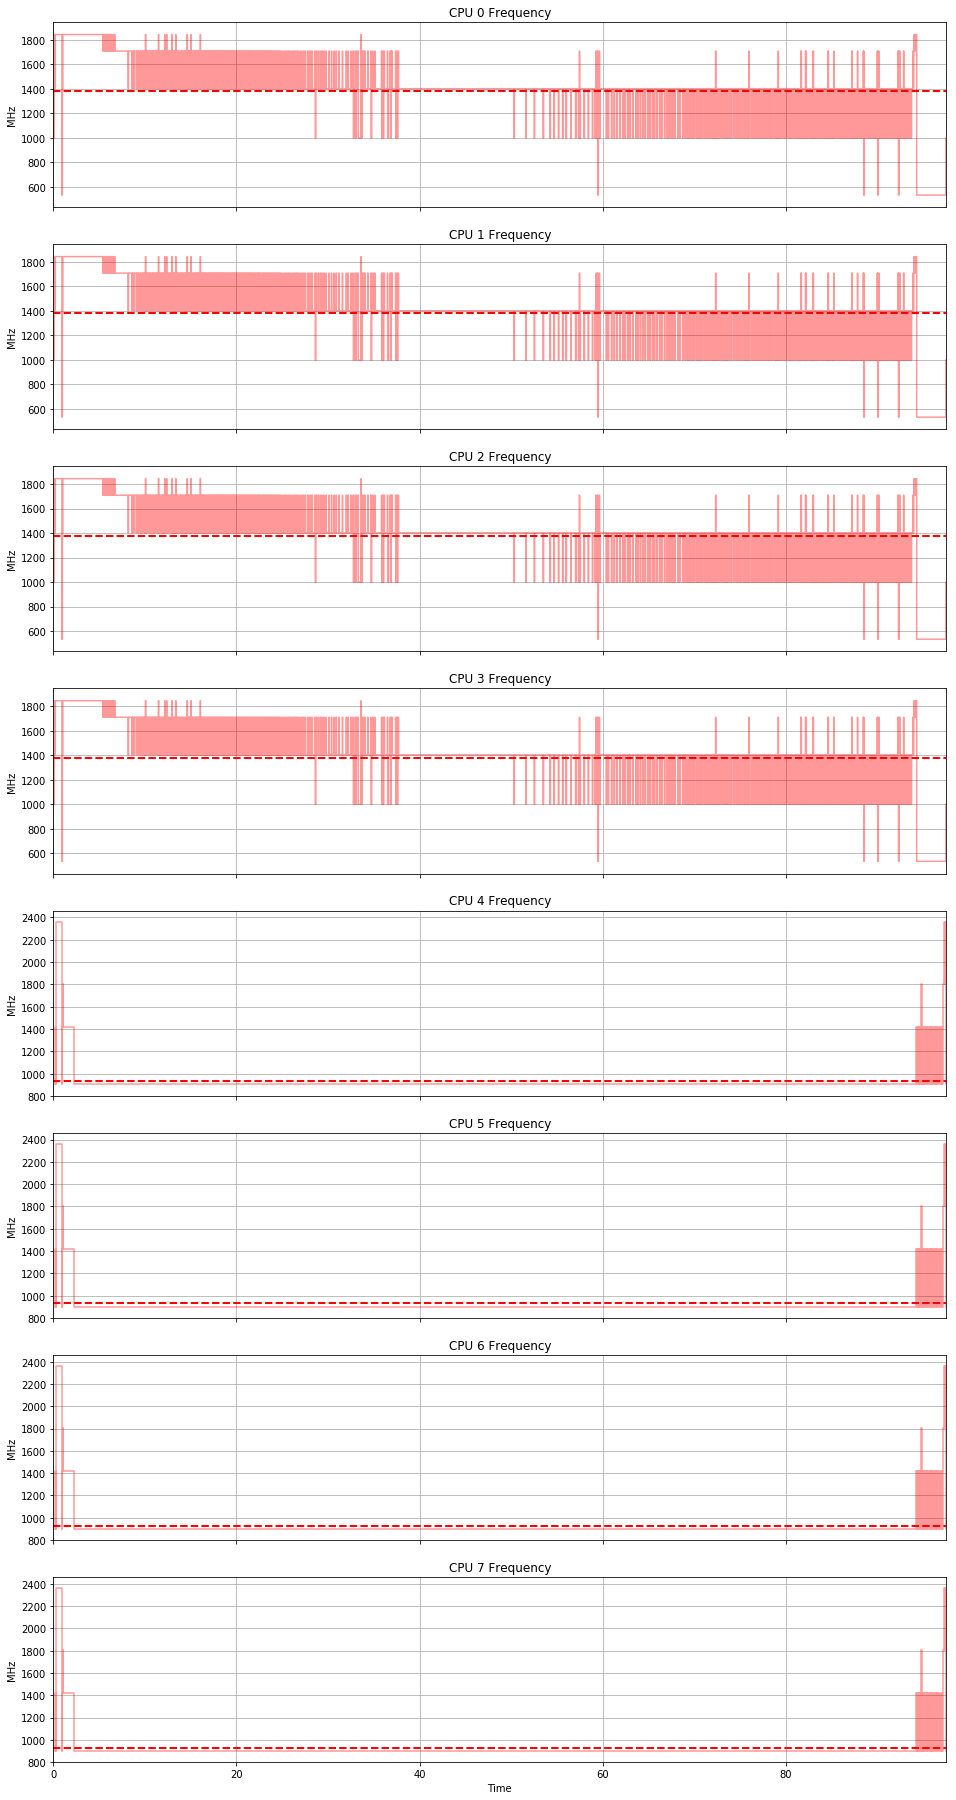

In [7]:
trace.analysis.frequency.plotCPUFrequencies()

2018-02-14 18:08:13,568 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:13,608 WARNING : Analysis     : Event [sched_overutilized] not found, plot DISABLED!
2018-02-14 18:08:13,969 INFO    : Analysis     : LITTLE cluster average frequency: 1.380 GHz
2018-02-14 18:08:13,971 INFO    : Analysis     : big    cluster average frequency: 0.930 GHz
2018-02-14 18:08:13,974 INFO    : root         : Plotting cluster frequencies for [sched]...


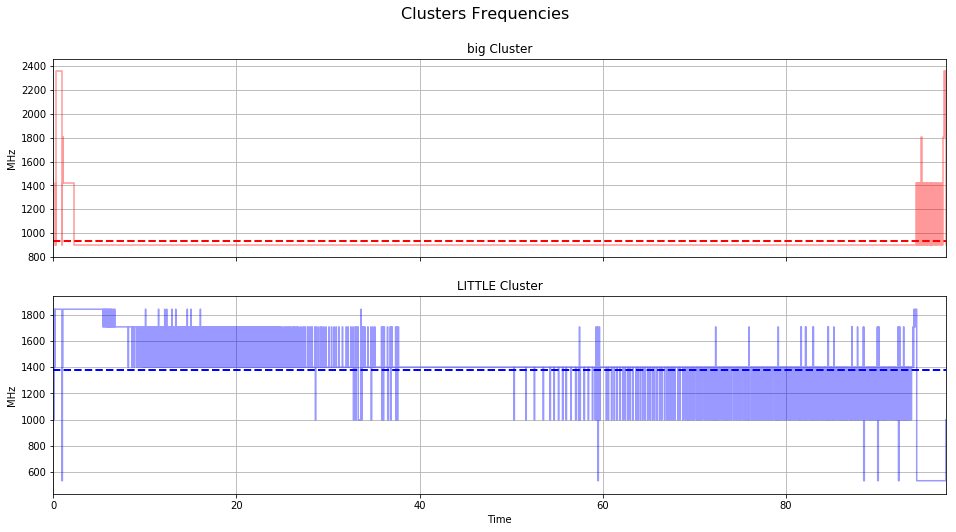

In [8]:
try:
    trace.analysis.frequency.plotClusterFrequencies();
    logging.info('Plotting cluster frequencies for [sched]...')
except: pass